In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')
import matplotlib.pyplot as plt

In [2]:
x,y=mnist.data,mnist.target
x.shape

(70000, 784)

In [3]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
y=y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [5]:
y.shape

(70000,)

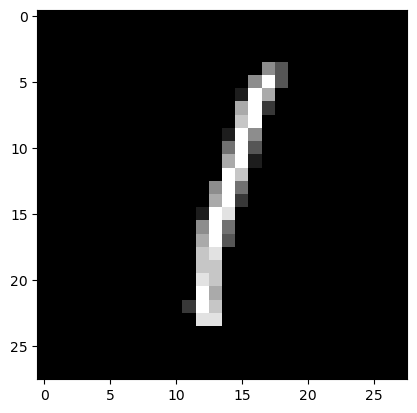

In [6]:
random_index = np.random.randint(0, x.shape[0])
plt.imshow(x[random_index].reshape(28,28), cmap='gray')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]


In [8]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [33]:
y_train5=(y_train==5)
y_test5=(y_test==5)
y_test5

array([False, False, False, ..., False,  True, False])

In [22]:
sgd=SGDClassifier(random_state=42)
sgd.fit(X_train,y_train5)


SGDClassifier(random_state=42)

In [31]:

pred=sgd.predict(X_test)
pred

array([False, False, False, ..., False,  True, False])

In [32]:
accuracy = accuracy_score(y_test5, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9492


In [35]:
sgd=SGDClassifier(random_state=42)
sgd.fit(X_train,y_train)


SGDClassifier(random_state=42)

In [36]:

pred=sgd.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.874


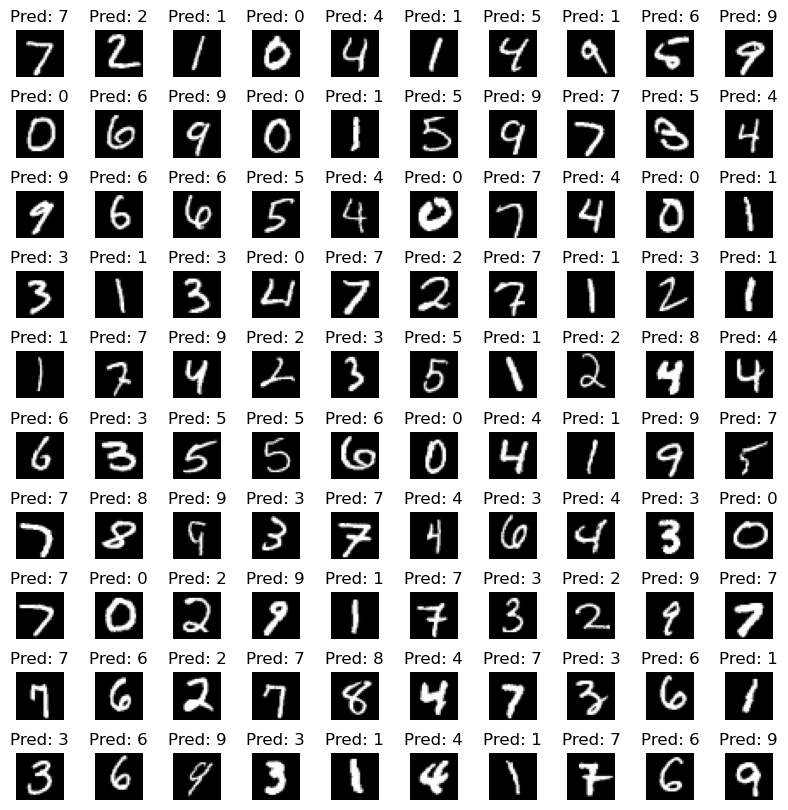

In [48]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
axes = axes.ravel()  

for i in range(100):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Pred: {pred[i]}")
    axes[i].axis('off')  

plt.subplots_adjust(hspace=0.7)
plt.show()


## Cross Validation


In [15]:
from sklearn.model_selection import cross_val_score

In [38]:
cross_val_score(sgd,X_train,y_train5,cv=3,scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

In [39]:
cross_val_score(sgd,X_train,y_train,cv=3,scoring='accuracy')


array([0.87365, 0.85835, 0.8689 ])

In [42]:
from sklearn.model_selection import cross_val_predict

y_train_pred1 = cross_val_predict(sgd, X_train, y_train, cv=3)


In [43]:
y_train_pred1

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [44]:
y_train_pred = cross_val_predict(sgd, X_train, y_train5, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train5, y_train_pred)
cm


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [49]:
cm = confusion_matrix(y_train5, y_train5)
cm


array([[54579,     0],
       [    0,  5421]], dtype=int64)